In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

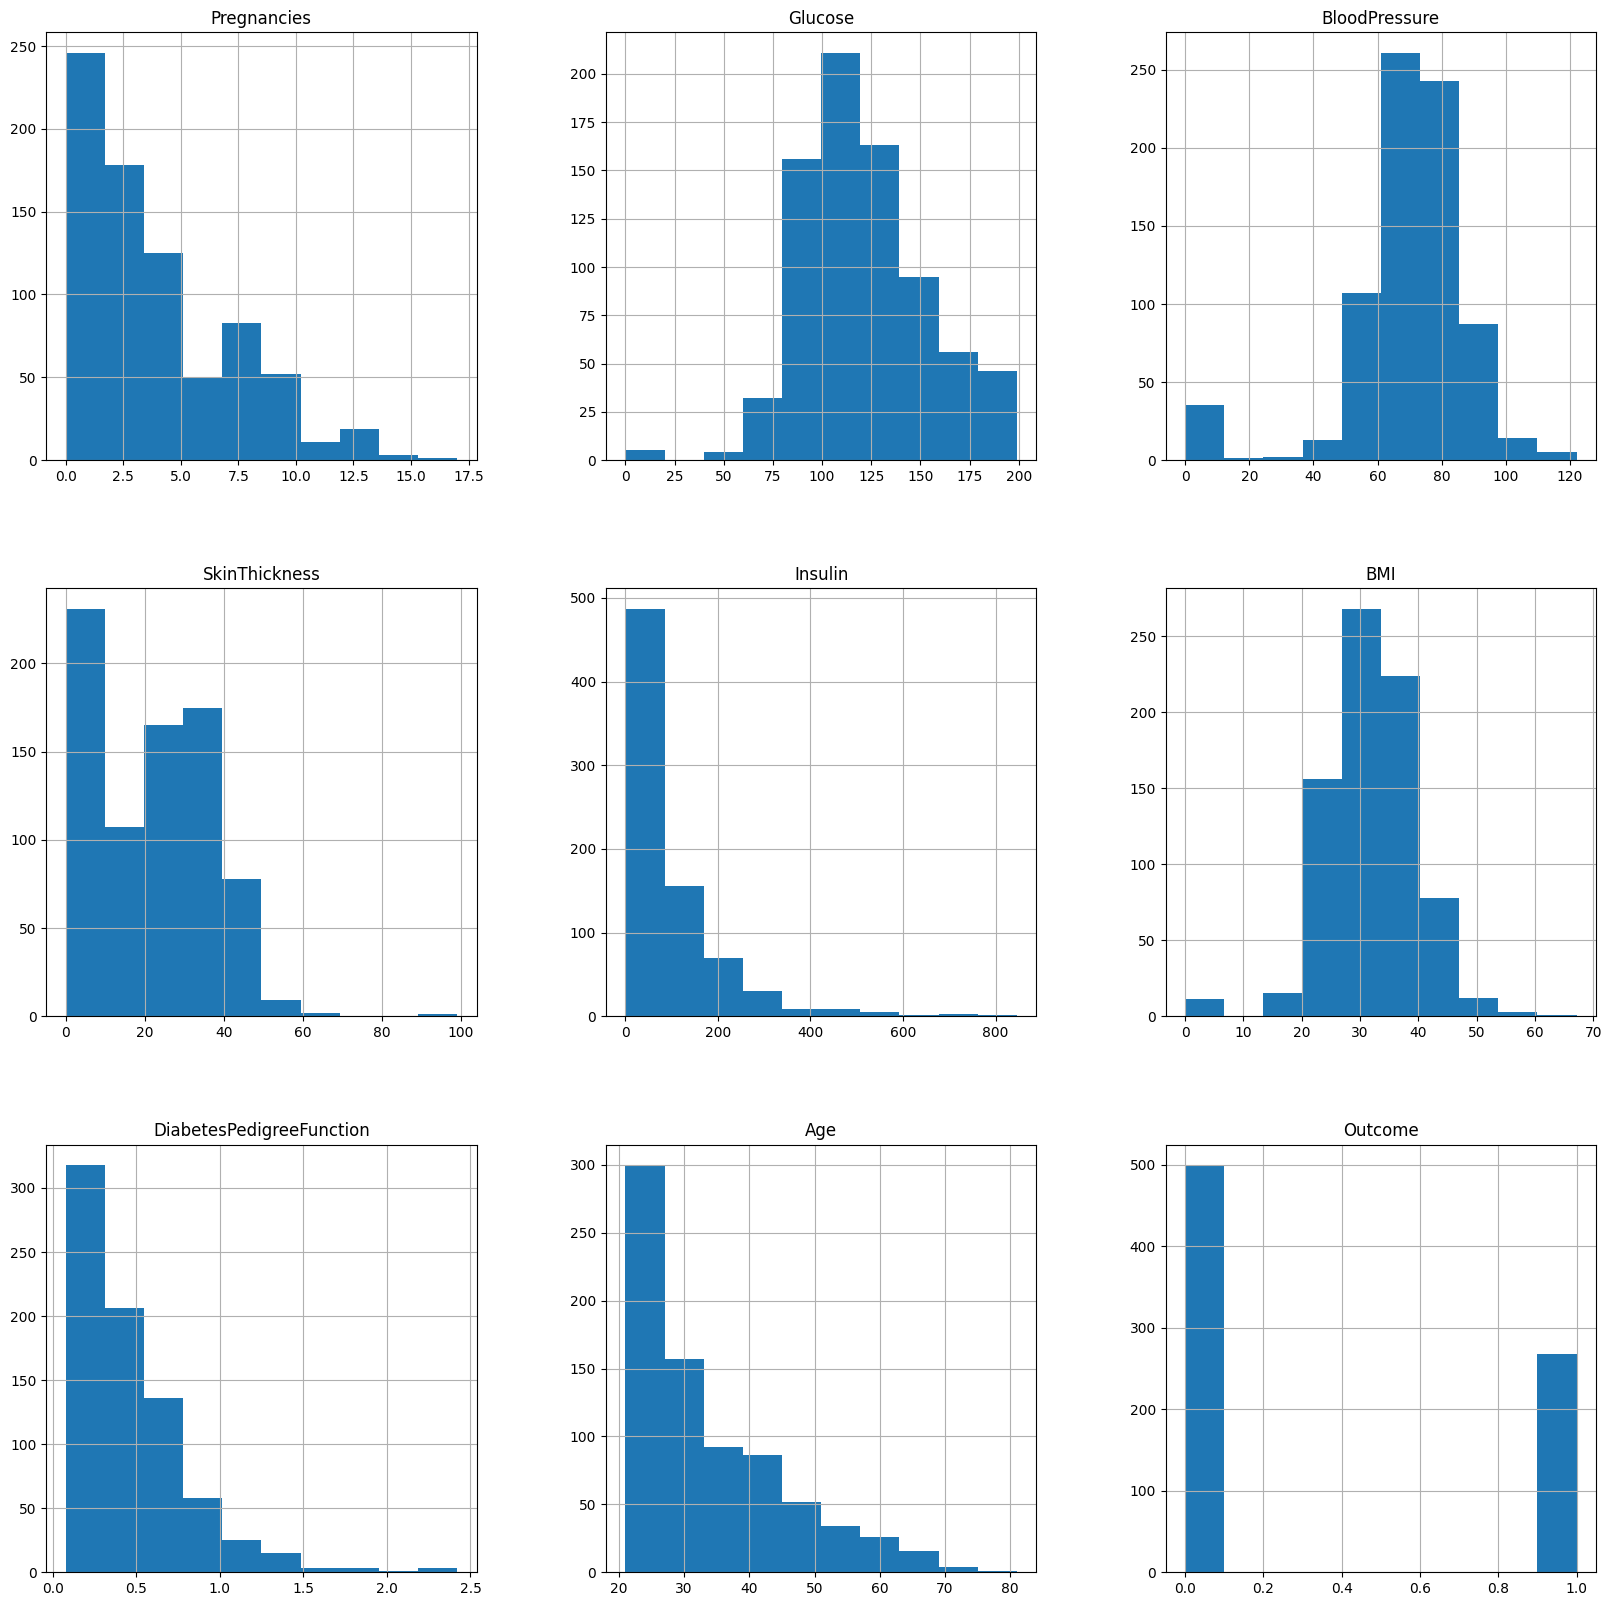

In [4]:
p = diabetes_data.hist(figsize= (20,20))
p

In [5]:
 diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
diabetes_data.shape

(768, 9)

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
# from imblearn.over_sampling import SMOTE

# # Separate features and target variable
# X = diabetes_data.iloc[:, :-1]
# y = diabetes_data.iloc[:, -1]

# # Apply SMOTE to balance the classes
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check new class distribution
# pd.Series(y_resampled).value_counts(normalize=True)


Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64

In [23]:
x = diabetes_data.drop(columns = 'Outcome', axis = 1)
y = diabetes_data['Outcome']

In [24]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [25]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(x)

StandardScaler()

In [29]:
standardized_data = scaler.transform(x)

In [30]:
print(y)
print(standardized_data)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [31]:
x = standardized_data

In [73]:
X_Train,X_Test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)
# X_train, X_test, Y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [74]:
print(diabetes_data.shape,X_train.shape,X_test.shape)

(768, 9) (800, 8) (200, 8)


In [75]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [78]:
classifier.fit(X_Train,Y_train)

SVC(kernel='linear')

In [80]:
X_train_predict = classifier.predict(X_Train)
training_data_accuracy = accuracy_score(X_train_predict,Y_train)

In [81]:
print('Acurracy score of the training data : ',training_data_accuracy)

Acurracy score of the training data :  0.7866449511400652


In [83]:
X_test_predict = classifier.predict(X_Test)
test_data_accuracy = accuracy_score(X_test_predict,Y_test)
print('Acurracy score of the test data : ',test_data_accuracy)

Acurracy score of the test data :  0.7727272727272727


with SVM (support vector machine on a dataset of 1lakh enteries with 9 features) it provides training data accuracy of 96% and test data accuracy of 96% as well .
now we will create a prediction system.

In [84]:
input_data = (13,126,90,0,0,43.4,0.583,42) 
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 2.7187125   0.1597866   1.08020025 -1.28821221 -0.69289057  1.44782138
   0.33560676  0.74529338]]


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
prediction_svm = classifier.predict(std_data)
print(prediction_svm)

[1]


In [87]:
if prediction_svm[0] == 0:
     print('non diabetic')
else :
      print('diabetic')

diabetic


This marks the end for support vector machine classification algorithm after this we will deep dive into random forest model.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
from imblearn.over_sampling import SMOTE  

# Separate features and target variable
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
pd.Series(y_resampled).value_counts(normalize=True)


Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64

we have applied algorithm for random forest to handle class imbalance . using smote (tatistical method for balancing an imbalanced dataset. It does this by creating synthetic samples of the minority class)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [64]:
random_forest = RandomForestClassifier(n_estimators=100 , max_depth = 4,  random_state=42)
random_forest.fit(X_train, y_train)
xtest_predict = random_forest.predict(X_test)
xtrain_predict = random_forest.predict(X_train)
#max_depth controls the depth of trees avoid overfitting
#n_estimator tells no of decision trees too many can create overfitting
#random_state is a value that controls randomness for eg like in training 
#and testing random state = 2 , If not set, every time you train the model
#, you'll get slightly different results.

In [65]:
test_accuracy = accuracy_score(xtest_predict,y_test)
print('Acurracy score of the test data : ',test_accuracy)
train_accuracy = accuracy_score(xtrain_predict,y_train)
print('Acurracy score of the train data : ',train_accuracy)

Acurracy score of the test data :  0.805
Acurracy score of the train data :  0.82875


In [66]:
print('svm')
print(confusion_matrix(Y_test,X_test_predict))
print()
print('random forest')
print(confusion_matrix(y_test,xtest_predict))

svm
[[91  9]
 [26 28]]

random forest
[[75 25]
 [14 86]]


Test Data Confusion Matrix of svm lly of random forest
for 1lakh dataset.
TP (Correct Positives): 18207
FP (Incorrect Positives): 93
FN (Missed Positives): 687
TN (Correct Negatives): 1013
for random forest this ^^^
True Negatives (TN) = 75 → Predicted No Diabetes, actually No Diabetes
False Positives (FP) = 25 → Predicted Diabetes, actually No Diabetes (Type I Error)
False Negatives (FN) = 14 → Predicted No Diabetes, actually Diabetes (Type II Error)
True Positives (TP) = 86 → Predicted Diabetes, actually Diabetes

In [67]:
from sklearn.metrics import classification_report

print("SVM Performance for test data:")
print(classification_report(Y_test, X_test_predict))
print('-----------------------------------------------------------------------------')
print("Random Forest Performance for test data :")
print(classification_report(y_test, xtest_predict))


SVM Performance for test data:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

-----------------------------------------------------------------------------
Random Forest Performance for test data :
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       100
           1       0.77      0.86      0.82       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



In [68]:
print("SVM Performance for train data:")
print(classification_report(Y_train, X_train_predict))

print("Random Forest Performance for train data :")
print(classification_report(y_train, xtrain_predict))


SVM Performance for train data:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.75      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614

Random Forest Performance for train data :
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       400
           1       0.82      0.85      0.83       400

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



In [88]:
prediction_rf = random_forest.predict(std_data)
print(prediction_svm)
print(prediction_rf)

[1]
[0]


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [89]:
if prediction_rf[0] == 1:
     print('patient is diabetic')
else :
    print('patient does not have diabetes')


if prediction_svm[0] == 1 :
       print('patient is diabetic')
else :
    print('patient does not have diabetes')
    

patient does not have diabetes
patient is diabetic


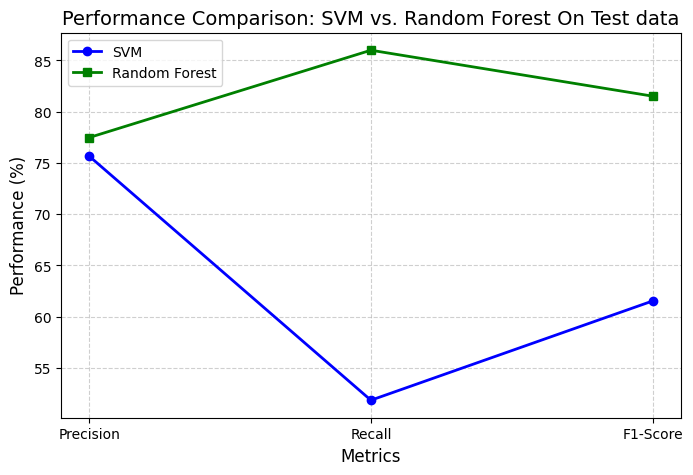

In [91]:
import matplotlib.pyplot as plt
# Assuming y_test (actual labels) and y_pred_svm, y_pred_rf (predicted labels from SVM & RF)
svm = classification_report(Y_test,  X_test_predict, output_dict=True)
random_forest = classification_report(y_test, xtest_predict , output_dict=True)

# Extracting Precision, Recall, F1-score (for class 1, i.e., the positive class)
metrics = ["Precision", "Recall", "F1-Score"]
svm_scores = [
    svm["1"]["precision"] * 100,
    svm["1"]["recall"] * 100,
    svm["1"]["f1-score"] * 100
]
rf_scores = [
    random_forest["1"]["precision"] * 100,
    random_forest["1"]["recall"] * 100,
    random_forest["1"]["f1-score"] * 100
]

# Create Line Graph
plt.figure(figsize=(8, 5))

plt.plot(metrics, svm_scores, marker="o", linestyle="-", color="blue", label="SVM", linewidth=2)
plt.plot(metrics, rf_scores, marker="s", linestyle="-", color="green", label="Random Forest", linewidth=2)

# Labels and title
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Performance (%)", fontsize=12)
plt.title("Performance Comparison: SVM vs. Random Forest On Test data", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


Why Use output_dict=True?
✅ Easier to extract values → You can directly access precision, recall, or F1-score.
✅ Useful for plotting graphs → Convert values into lists or Pandas DataFrame for

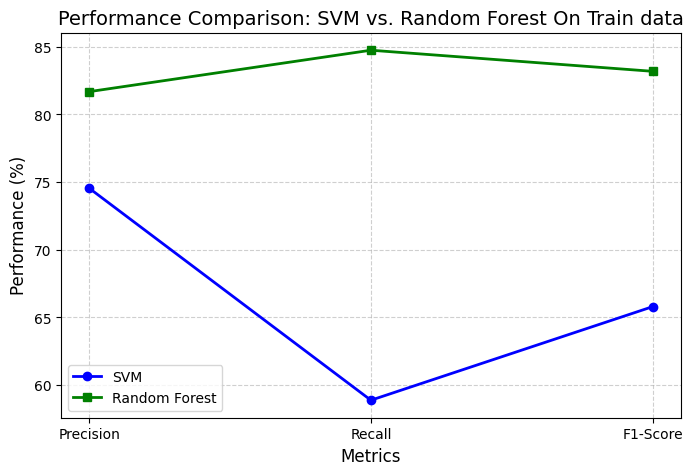

In [92]:
sv_m = classification_report(Y_train,  X_train_predict, output_dict=True)
r_forest = classification_report(y_train, xtrain_predict , output_dict=True)

# Extracting Precision, Recall, F1-score (for class 1, i.e., the positive class)
metrics = ["Precision", "Recall", "F1-Score"]
sv_scores = [
    sv_m["1"]["precision"] * 100,
    sv_m["1"]["recall"] * 100,
    sv_m["1"]["f1-score"] * 100
]
f_scores = [
    r_forest["1"]["precision"] * 100,
    r_forest["1"]["recall"] * 100,
    r_forest["1"]["f1-score"] * 100
]

# Create Line Graph
plt.figure(figsize=(8, 5))

plt.plot(metrics, sv_scores, marker="o", linestyle="-", color="blue", label="SVM", linewidth=2)
plt.plot(metrics, f_scores, marker="s", linestyle="-", color="green", label="Random Forest", linewidth=2)

# Labels and title
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Performance (%)", fontsize=12)
plt.title("Performance Comparison: SVM vs. Random Forest On Train data", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


random forest clearly outperform svm in train dataset. 

Random forest is better to use on medical data.

According to research, in many cases, Random Forest tends to outperform Support Vector Machines (SVM) when it comes to medical data prediction due to its ability to handle complex non-linear relationships, manage missing data better, and generally provide higher accuracy on diverse medical datasets, especially when dealing with imbalanced classes;

Overfitting means creating a model that matches (memorizes) the training set so closely that the model fails to make correct predictions on new data. An overfit model is analogous to an invention that performs well in the lab but is worthless in the real world.

In [261]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [262]:
!pip install shap 

Defaulting to user installation because normal site-packages is not writeable


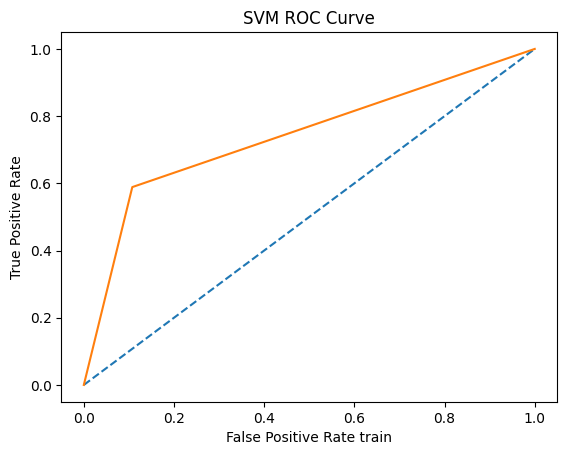

In [93]:
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(Y_train, X_train_predict)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate train")
plt.ylabel("True Positive Rate")
plt.title('SVM ROC Curve')
plt.show()

In [94]:
fpr, tpr, thresholds = roc_curve(Y_test, X_test_predict)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate test")
plt.ylabel("True Positive Rate")
plt.title('SVM ROC Curve')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [200, 154]